In [6]:
from astropy.table import Table
import matplotlib.pyplot as plt
import matplotlib
import MegaScreen
import numpy as np
import scipy.integrate
from test_Noll import Noll
from test_spectrum import interf_spectrum_quad as interf_spectrum
import functools

#%matplotlib notebook
%matplotlib inline
%config InlineBackend.figure_formats=['svg']
#matplotlib.rcParams['savefig.dpi'] = 200
matplotlib.rcParams['text.usetex'] = False

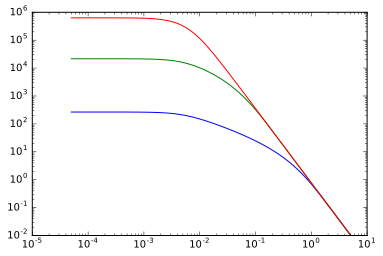

In [8]:
def PlotInterfSpectrum(r0,L0,baseline,fmin=1e-5,fmax=1,numpoint=100):
    f=np.logspace(np.log10(fmin),np.log10(fmax),numpoint)
    plt.loglog(f*r0,interf_spectrum(baseline,f,r0=r0,L0=L0))

for r0 in [3,30,300]:
    PlotInterfSpectrum(5,1000,r0)

/usr/local/lib/python3.5/site-packages/scipy/integrate/quadpack.py:352: IntegrationWarning: The maximum number of subdivisions (400) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


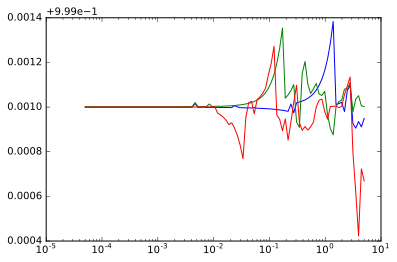

In [9]:
def interf_spectrum_old(baseline, frequencies, r0, L0):
    return np.array([8 * scipy.integrate.quad(lambda u, f, b, r0, L0:
                                    MegaScreen.VonKarmanSpectrum(np.sqrt(u**2+f**2), r0, L0) *
                                    (1.0 - np.cos(2 * np.pi * u * b)),
                                    0, np.inf, args=(f, baseline, r0, L0), epsrel=1e-3,
                                    limit=400)[0]
            for f in frequencies])

def CompareSpectra(r0,L0,baseline,fmin=1e-5,fmax=1,numpoint=100):
    f=np.logspace(np.log10(fmin),np.log10(fmax),numpoint)
    plt.semilogx(f*r0,interf_spectrum(baseline,f,r0=r0,L0=L0)/interf_spectrum_old(baseline,f,r0=r0,L0=L0))

for r0 in [3,30,300]:
    CompareSpectra(5,1000,r0)